<b><font size="6">Naive Bayes</font><a class="anchor"><a id='toc'></a></b><br>

In this notebook we are going to apply Naive Bayes in Python.

<div class="alert alert-block alert-info">
    
# TOC<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Gaussian Naive Bayes</font>](#first-bullet) <br>
- [<font color='#E8800A'>Naive Bayes for Categorical Data</font>](#second-bullet)<br>
- [<font color='#E8800A'>Exercise</font>](#third-bullet)<br>
    
</div>

<a class="anchor" id="company">

## Tugas Dataset
</a>

Tugas is a on-line Portuguese retailer offering an assortment of goods within 5 major categories: 

1. Clothes
2. Housekeeping
3. Kitchen
4. Small appliances
5. Toys

Tugas started a loyalty program 2 years ago. Among other objectives, the program’s aim is to gather Customer information to better drive the marketing efforts.

Bellow is the description of the data. Note that `Education`and `Marital_Status`are categorical variables that have been transformed into dummys.<br>

<img src="image\variables.png" style="height:450px">
<hr>

### 1. Import the data

__`Step 1:`__ Import Tugas Dataset (don't forget to import pandas to read the excel file).

In [1]:
import pandas as pd
from pandas import read_excel

df_tugas = pd.read_excel('tugas_dataset.xlsx')

### 2. Explore the data

__`Step 2:`__ It is time to explore and understand the data we have.

__`Step 2.1:`__ Check the first five rows of the dataset `tugas_dataset` using the method `.head()`.

In [2]:
df_tugas.head()

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar
0,1003,1991,1,0,1,0,0,1,29761.20,69,...,1,24,59,41,3,0,1,0,0,0
1,1004,1956,1,0,1,0,0,1,98249.55,10,...,6,5,35,65,5,0,0,1,0,0
2,1006,1983,0,0,0,1,0,1,23505.30,65,...,2,1,67,33,4,0,0,0,1,0
3,1007,1970,0,0,0,0,0,1,72959.25,73,...,1,8,46,54,4,0,1,0,0,0
4,1009,1941,0,0,1,0,0,0,114973.95,75,...,9,9,17,83,5,0,1,0,0,0


__`Step 2.2:`__ Using the method `.info()`, check the data types of the variables of `tugas_dataset` and if there are any missing values.

In [3]:
df_tugas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Custid                   2500 non-null   int64  
 1   Year_Birth               2500 non-null   int64  
 2   Gender_M                 2500 non-null   int64  
 3   Marital_Status_Divorced  2500 non-null   int64  
 4   Marital_Status_Married   2500 non-null   int64  
 5   Marital_Status_Together  2500 non-null   int64  
 6   Marital_Status_Widow     2500 non-null   int64  
 7   Dependents               2500 non-null   int64  
 8   Income                   2431 non-null   float64
 9   Rcn                      2500 non-null   int64  
 10  Frq                      2500 non-null   int64  
 11  Mnt                      2500 non-null   float64
 12  Clothes                  2500 non-null   int64  
 13  Kitchen                  2500 non-null   int64  
 14  SmallAppliances         

__`Step 2.3:`__ Get the main descriptive statistics for all the variables in `tugas_dataset` using the method `.describe()`.

In [3]:
df_tugas.describe()

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2431.000000,2500.000000,...,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,6029.178400,1966.737200,0.234000,0.092400,0.380800,0.242400,0.046000,0.701200,74062.838873,62.938400,...,6.88080,6.92920,42.077600,57.922400,3.952800,0.119600,0.494800,0.148800,0.066800,0.070000
std,2911.943629,17.046019,0.423457,0.289648,0.485681,0.428621,0.209527,0.457824,28807.225833,69.643494,...,7.63363,7.92094,18.274582,18.274582,1.141531,0.324558,0.500073,0.355962,0.249725,0.255198
min,1003.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10500.000000,0.000000,...,0.00000,0.00000,5.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3466.500000,1952.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51013.725000,27.000000,...,2.00000,1.00000,27.000000,43.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6028.500000,1966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,74525.850000,53.000000,...,4.00000,4.00000,45.000000,55.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8599.250000,1981.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,97300.875000,78.000000,...,9.00000,10.00000,57.000000,73.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,10997.000000,1997.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,144204.900000,549.000000,...,54.00000,77.00000,88.000000,95.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Prepare the data

__`Step 3:`__ After the exploration and understanding of data, we need to fix possible problems on data like missing values or outliers and we can create new variables in order to get variables with higher predictive power.

#### 3.1. Incoherences

__`Step 3.1:`__ After exploring the dataset, in this step check for any kind of mismatches, inconsistencies, __incoherence__ and redundancies.

In [5]:
df_tugas['Recomendation'].unique()

array([3, 5, 4, 1, 2, 6], dtype=int64)

In the description of the dataset, it is written that the variable _Recomendation_ only assumes values from 0-5.

In [6]:
df_tugas.loc[(df_tugas['Mnt'] > 0) & (df_tugas['Frq'] == 0)]

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar


Checking if there are any clients that have spent money, but do not have any purchase registered.

#### 3.2. Outliers

__`Step 3.2:`__ The __outliers__ can be a result of a mistake during data collection or it can be just an indication of variance in your data. Check if there are any since these can negatively influence the model.

In [7]:
hk_mean = df_tugas['HouseKeeping'].mean()
hk_std = df_tugas['HouseKeeping'].std()

df_tugas.loc[df_tugas['HouseKeeping'] > hk_mean + 5 * hk_std]

,Custid,Year_Birth,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Dependents,Income,Rcn,...,HouseKeeping,Toys,NetPurchase,CatPurchase,Recomendation,Education_Basic,Education_Graduation,Education_Master,Education_PhD,DepVar
514,3028,1992,0,0,0,0,0,1,23139.90,23,...,54,0,56,44,5,0,1,0,0,0
724,3932,1996,0,0,0,0,0,1,27989.85,94,...,50,1,45,55,4,1,0,0,0,0
804,4254,1995,0,0,0,0,0,1,22707.30,8,...,48,2,55,45,3,1,0,0,0,0
1029,5148,1957,0,0,0,1,0,1,97655.25,55,...,46,3,42,58,4,1,0,0,0,0
1544,7258,1995,1,0,0,0,0,1,26341.35,22,...,49,3,73,27,4,1,0,0,0,0


#### 3.3. Null values

__`Step 3.3:`__ Handling __missing data__ is important as many machine learning algorithms do not support data with missing values.

In [8]:
df_tugas['Income'] = df_tugas['Income'].fillna(df_tugas['Income'].median())

In [9]:
df_tugas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Custid                   2500 non-null   int64  
 1   Year_Birth               2500 non-null   int64  
 2   Gender_M                 2500 non-null   int64  
 3   Marital_Status_Divorced  2500 non-null   int64  
 4   Marital_Status_Married   2500 non-null   int64  
 5   Marital_Status_Together  2500 non-null   int64  
 6   Marital_Status_Widow     2500 non-null   int64  
 7   Dependents               2500 non-null   int64  
 8   Income                   2500 non-null   float64
 9   Rcn                      2500 non-null   int64  
 10  Frq                      2500 non-null   int64  
 11  Mnt                      2500 non-null   float64
 12  Clothes                  2500 non-null   int64  
 13  Kitchen                  2500 non-null   int64  
 14  SmallAppliances         

#### 3.4. Feature Selection

__`Step 3.4:`__ Irrelevant or partially relevant features can negatively impact model performance. Besides that, having correlated independent data can also harm the model. In this way, check the correlation matrix in this step.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

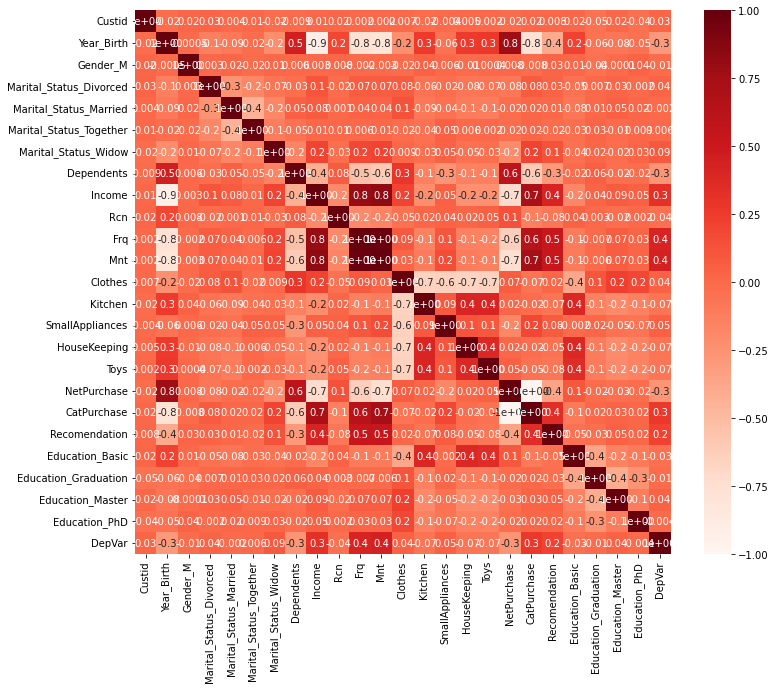

In [11]:
cor_pearson = df_tugas.corr()
cor_heatmap(cor_pearson)

Decide which variables to keep or withdraw.

In [12]:
#df_tugas = df_tugas.drop(['Income'], axis=1)

### 4. Modelling

__`Step 4:`__ It is time to create a model. At this step, we are going to implement the Naive Bayes algorithm.

# <font color='#E8800A'>Gaussian Naive Bayes</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

First we start with a dataset called tugas, which has continuos and categorical attributes and a binary target variable. 
Because we have continuos attributes we will be using Gaussian Naive Bayes, so the likelihood of the features is assumed to be Gaussian:

<div>
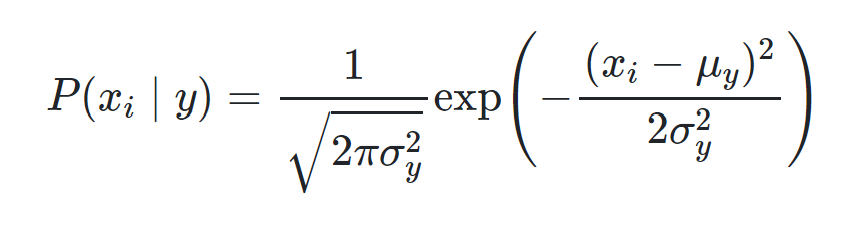
</div>

__`Step 4.1:`__ Import GaussianNB from sklearn.naive_bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

__`Step 4.2:`__ Assign to the object `data` the values from tugas excepting the dependent variable

In [14]:
data = df_tugas.drop(['DepVar', 'Custid'], axis=1)

__`Step 4.3:`__ Assign to the object `target`the dependent variable from tugas

In [15]:
target = df_tugas['DepVar']

__`Step 4.4:`__ Import train_test_split from sklearn.model_selection

In [16]:
from sklearn.model_selection import train_test_split

__`Step 4.5:`__ Split the dataset tugas into X_train, X_val, y_train and y_val, defining `test_size` as 0.25 , `random_state`equal to 5 and `stratify` by the target.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, stratify = target, random_state=5)

__`Step 4.6:`__ Using GaussianNB, create a Naive Bayes classifier instance called modelNB.

In [18]:
modelNB = GaussianNB(var_smoothing=0.0001)

### Methods in GaussianNB

__`Step 4.7:`__ Use the `.fit()`method of model to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [19]:
modelNB.fit(X = X_train, y = y_train)

GaussianNB(var_smoothing=0.0001)

__`Step 4.8:`__ Use the `.predict()` method of modelNB to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [20]:
labels_train = modelNB.predict(X_train)
labels_val = modelNB.predict(X_val)

__`Step 4.9:`__ Use the `.predict_proba()` method of modelNB to obtain the probability estimates for the `X_val`

In [21]:
modelNB.predict_proba(X_val)

array([[9.10433239e-02, 9.08956676e-01],
       [9.96827515e-01, 3.17248480e-03],
       [9.13395397e-01, 8.66046035e-02],
       ...,
       [9.86923482e-01, 1.30765176e-02],
       [4.20383663e-01, 5.79616337e-01],
       [9.99998337e-01, 1.66251953e-06]])

__`Step 4.10:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`

In [22]:
modelNB.score(X_train, y_train)

0.9034666666666666

__`Step 4.11:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given test data `X_val` and the true labels for X, `y_val`

In [23]:
modelNB.score(X_val, y_val)

0.8976

By comparing the results of Step 11 and Step 12 we can verify that the accuracy of the model is slightly higher in the train dataset, as usual.

### Attributes in GaussianNB

__`Step 4.12:`__ Call the attribute `.class_prior_` in modelNB to check the probability of each class. 

In [24]:
modelNB.class_prior_

array([0.93013333, 0.06986667])

In here you can verify that the probability of the dependent variable being one in our dataset is only 7% from the total dataset.

__`Step 4.13:`__ Call the attribute `.class_count_` in modelNB to verify the number of training samples observed in eacg class.

In [25]:
modelNB.class_count_

array([1744.,  131.])

In the training dataset, 1744 observations have 0 as dependent variable, while only 131 observations have 1 as dependent variable.

__`Step 4.14:`__ Call the attribute `.theta_` in modelNB to verify the mean of each feature per class.

In [26]:
modelNB.theta_

array([[1.96800344e+03, 2.36238532e-01, 9.57568807e-02, 3.87614679e-01,
        2.34518349e-01, 3.95642202e-02, 7.40825688e-01, 7.14537987e+04,
        6.42586009e+01, 1.87545872e+01, 5.73144358e+02, 5.06680046e+01,
        7.16513761e+00, 2.80028670e+01, 7.13933486e+00, 7.00917431e+00,
        4.33497706e+01, 5.66502294e+01, 3.86639908e+00, 1.25573394e-01,
        4.99426606e-01, 1.39334862e-01, 6.70871560e-02],
       [1.94877099e+03, 2.21374046e-01, 1.29770992e-01, 3.81679389e-01,
        2.44274809e-01, 9.92366412e-02, 2.67175573e-01, 1.08335024e+05,
        5.44580153e+01, 3.70381679e+01, 1.74598534e+03, 5.53435115e+01,
        5.21374046e+00, 2.96106870e+01, 4.77862595e+00, 5.07633588e+00,
        2.47786260e+01, 7.52213740e+01, 4.84732824e+00, 9.92366412e-02,
        4.73282443e-01, 1.83206107e-01, 5.34351145e-02]])

In some variables we can verify that the mean is distinct taking into account the dependent variable associated. Take as example the variable Mnt (in the seventh column):
- For the customers where the dependent variable is 0, the value of Mnt is around 573 monetary units;
- For the customers who bougth the product (dependent variable = 1), the money spent is around 1746 monetary units.

_Note:_ If you dont remember the order of the variables, you can always call `data.columns`.

In [27]:
data.columns

Index(['Year_Birth', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Dependents', 'Income', 'Rcn', 'Frq', 'Mnt',
       'Clothes', 'Kitchen', 'SmallAppliances', 'HouseKeeping', 'Toys',
       'NetPurchase', 'CatPurchase', 'Recomendation', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

__`Step 4.15:`__ Call the attribute `.sigma_` in modelNB to verify the variance of each feature per class.

In [28]:
modelNB.sigma_

array([[8.00012625e+04, 7.97209830e+04, 7.97208892e+04, 7.97210400e+04,
        7.97209821e+04, 7.97208406e+04, 7.97209946e+04, 7.40837921e+08,
        8.50331950e+04, 7.98194970e+04, 4.42452407e+05, 8.02800072e+04,
        7.97839818e+04, 7.98788169e+04, 7.97849501e+04, 7.97827234e+04,
        8.00323190e+04, 8.00323190e+04, 7.97220973e+04, 7.97209124e+04,
        7.97210526e+04, 7.97209225e+04, 7.97208652e+04],
       [7.98109334e+04, 7.97209750e+04, 7.97209155e+04, 7.97210386e+04,
        7.97209872e+04, 7.97208920e+04, 7.97209984e+04, 2.83612544e+08,
        8.05806081e+04, 7.98057554e+04, 4.64318759e+05, 8.00966922e+04,
        7.97471997e+04, 7.98773762e+04, 7.97447918e+04, 7.97446747e+04,
        7.99394483e+04, 7.99394483e+04, 7.97215579e+04, 7.97208920e+04,
        7.97210519e+04, 7.97209523e+04, 7.97208532e+04]])

By calling the attribute sigma, we obtain the variance of each variable, for both labels (0 and 1).

### 5. Assess

__`Step 5:`__ We already have the ground truth and the predicted values. In this way we can start evaluating the performance of our model in the train and the validation dataset.

#### Presenting the classification report and the confusion matrix for Train and Validation

__`Step 5.1:`__ To evaluate the results, we are going to use the classification report method that will return the main classification metrics. <br>
Import `classification_report` and `confusion_matrix` from sklearn.metrics

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

__`Step 5.2:`__: Create  a function named `metrics` that will print the results of the classification report and the confusion matrix for both datasets (train and validation) _(written for you)_

In [30]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

__`Step 5.3:`__ Call the function metrics() defined previously, and define the arguments: <br> (`y_train = y_train`, `pred_train = labels_train` , `y_val = y_val`, `pred_val = labels_val`)

In [31]:
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1744
           1       0.38      0.63      0.48       131

    accuracy                           0.90      1875
   macro avg       0.68      0.78      0.71      1875
weighted avg       0.93      0.90      0.91      1875

[[1611  133]
 [  48   83]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

Now you have the main results for your training and validation dataset.

# <font color='#E8800A'>Naive Bayes for Categorical Data</font><a class="anchor" id="second-bullet"></a> 
[Back to TOC](#toc)

<a class="anchor" id="company">

## Weather Data
</a>

Now that we checked the case of continuos attributes, I present you a small dataset with only categorical attributes about playing or not tennis and we will build a Naive Bayes classifier from scratch!

__`Step 1:`__ Import the Dataset

In [32]:
weather = pd.read_csv('weather.csv')

In [33]:
weather['WINDY'] = weather['WINDY'].astype(str)

In [34]:
weather

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Overcast,Mild,Normal,False,Yes


Assume this instance: `today = (Sunny, Cool, High, True)`<br>
Now, with regards to our dataset, we can apply Bayes’ theorem in following way:


<div>
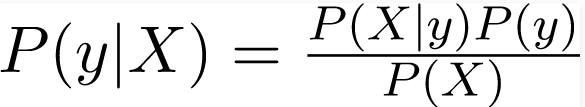
</div>

Where, y is class variable and X is a dependent feature vector (of size n) where:


<div>
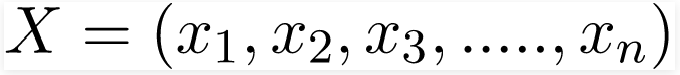
</div>

Now we will find the correct prediction by identifying the y that maximizes the probability of the data:


<div>
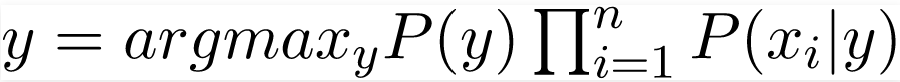
</div>

To do this in the next steps we calculate P(xi | yj) for each xi in X and yj in y.

__`Step 2:`__ Let's start with y = Yes.


<div>
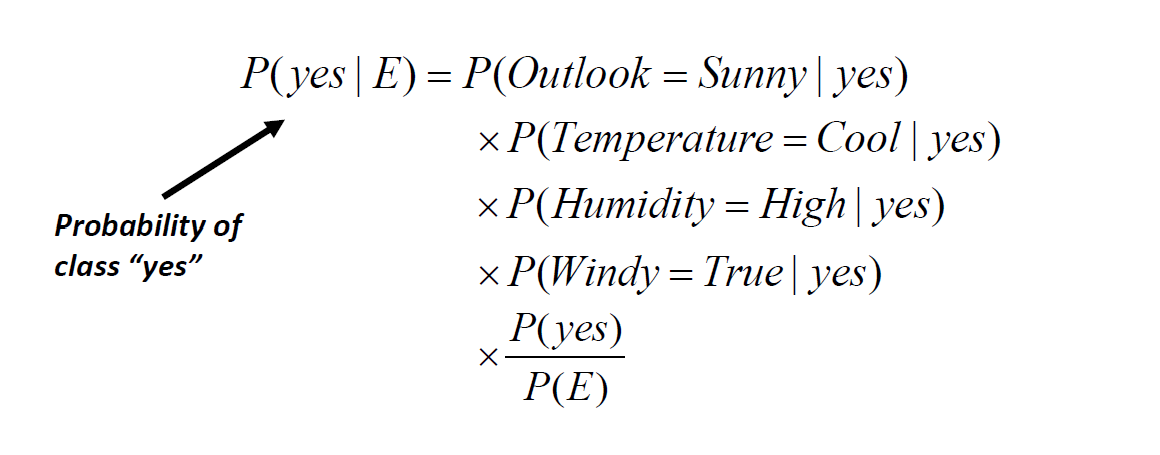
</div>

We simplify the calculations by making P(yes|today) approximately equal to P(Outlook = Sunny|Yes)* ... * P(Yes)

__`Step 2.1:`__ Calculate each part.

p1 = P(Outlook = Sunny|Yes)

In [35]:
p1 = len(weather[(weather.PLAY == 'Yes') & (weather.OUTLOOK == 'Sunny')]) / len(weather[weather.PLAY == 'Yes'])

p2 = P(Temperature = Cool|Yes)

In [36]:
p2 = len(weather[(weather.PLAY == 'Yes') & (weather.TEMPERATURE == 'Cool')]) / len(weather[weather.PLAY == 'Yes'])

p3 = P(Humidity = High|Yes)

In [37]:
p3 = len(weather[(weather.PLAY == 'Yes') & (weather.HUMIDITY == 'High')]) / len(weather[weather.PLAY == 'Yes'])

p4 = P(Wind = True|Yes)

In [38]:
p4 = len(weather[(weather.PLAY == 'Yes') & (weather.WINDY == 'True')]) / len(weather[weather.PLAY == 'Yes'])

p5 = P(Yes)

In [39]:
p5 = len(weather[weather.PLAY == 'Yes'])/len(weather)

p_yes_today = P(Yes|today)

In [40]:
p_yes_today = p1 * p2 * p3 * p4 * p5

In [41]:
p_yes_today

0.005291005291005291

__`Step 3:`__ No with y = No.

__`Step 3.1:`__ Calculate each part in the same manner as before.

In [42]:
p1 = len(weather[(weather.PLAY == 'No') & (weather.OUTLOOK == 'Sunny')]) / len(weather[weather.PLAY == 'No'])

In [43]:
p2 = len(weather[(weather.PLAY == 'No') & (weather.TEMPERATURE == 'Cool')]) / len(weather[weather.PLAY == 'No'])

In [44]:
p3 = len(weather[(weather.PLAY == 'No') & (weather.HUMIDITY == 'High')]) / len(weather[weather.PLAY == 'No'])

In [45]:
p4 = len(weather[(weather.PLAY == 'No') & (weather.WINDY == 'True')]) / len(weather[weather.PLAY == 'No'])

In [46]:
p5 = len(weather[weather.PLAY == 'No'])/len(weather)

In [47]:
p_no_today = p1 * p2 * p3 * p4 * p5

In [48]:
p_no_today

0.02057142857142857

__`Step 4:`__ Normalize the results to obtain:

<div>
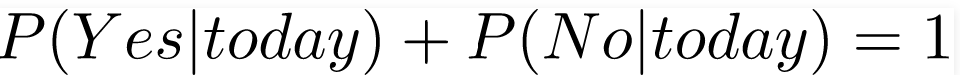
</div>

In [49]:
P_yes_today = p_yes_today / (p_yes_today + p_no_today)

In [50]:
P_yes_today

0.20458265139116202

In [51]:
P_no_today = p_no_today / (p_yes_today + p_no_today)

In [52]:
P_no_today

0.795417348608838

__Result:__ The outcome of today is No!

## Now we can use the sklearn Naive Bayes for categorical features to confirm our result

__`Step 1:`__ Import CategoricalNB from sklearn.naive_bayes

In [53]:
from sklearn.naive_bayes import CategoricalNB

__`Step 2:`__ Assign to the object `data` the dataset excepting the dependent variable

In [54]:
data = weather.drop(['PLAY'], axis=1)

__`Step 3:`__ Assign to the object `target`the dependent variable 

In [55]:
target = pd.DataFrame(weather['PLAY'], columns = ['PLAY'])

__`Step 4:`__ Encode the dataset to apply the model

__`Step 4.1:`__ Import the OrdinalEncoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder

__`Step 4.2:`__ Create two instances of the encoder

In [57]:
enc1 = OrdinalEncoder()
enc2 = OrdinalEncoder()

__`Step 4.3:`__ Fit the encoder to the data and the target

In [58]:
enc1.fit(data)

OrdinalEncoder()

In [59]:
data = pd.DataFrame(enc1.transform(data), columns = data.columns)

In [60]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
0,2.0,1.0,0.0,0.0
1,2.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0
4,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,1.0
6,0.0,0.0,1.0,1.0
7,2.0,2.0,0.0,0.0
8,2.0,0.0,1.0,0.0
9,0.0,2.0,1.0,0.0


In [61]:
target = enc2.fit_transform(target)

In [62]:
target

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

__`Step 5:`__ Split the dataset into X_train, X_val, y_train and y_val, defining `test_size` as 0.25 , `random_state`equal to 5 and `stratify` by the target.

In [63]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, stratify = target, random_state=5)

__`Step 6:`__ Using CategoricalNB, create a Naive Bayes classifier instance called modelNB2.

In [64]:
modelNB2 = CategoricalNB()

### Methods in CategoricalNB

__`Step 7:`__ Use the `.fit()`method of model to fit the model to the array of points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.

In [65]:
modelNB2.fit(X = X_train, y = y_train)

C:\Users\lara_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CategoricalNB()

__`Step 8:`__ Use the `.predict()` method to perform classification in `X_train` and assign to the object `labels_train`. Do the same for `X_val` and assign to the object `labels_val`.

In [66]:
labels_train = modelNB2.predict(X_train)
labels_val = modelNB2.predict(X_val)

__`Step 9:`__ Use the `.predict_proba()` method to obtain the probability estimates for the `X_val`

In [67]:
modelNB2.predict_proba(X_val)

array([[0.61049285, 0.38950715],
       [0.31982232, 0.68017768],
       [0.61049285, 0.38950715],
       [0.46545455, 0.53454545]])

__`Step 10:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`

In [68]:
modelNB2.score(X_train, y_train)

0.9

__`Step 11:`__ Use the `.score()` method of modelNB to obtain the mean accuracy of the given test data `X_val` and the true labels for X, `y_val`

In [69]:
modelNB2.score(X_val, y_val)

0.75

__`Step 12:`__ Make prediction for today!

In [70]:
today = (['Sunny', 'Cool', 'High', 'True'])

__`Step 13:`__ Transform the data with the encoder

In [71]:
today = enc1.transform([today])

__`Step 13.1:`__ Make the prediction for the encoded datapoint

In [72]:
result = modelNB2.predict(today)

In [73]:
result

array([0.])

__`Step 13.2:`__ Reverse the encoding to understand the result

In [74]:
enc2.inverse_transform([result])

array([['No']], dtype=object)

# <font color='#E8800A'>Exercise</font><a class="anchor" id="third-bullet"></a>
 [Back to TOC](#toc)

__`Exercise 1:`__ Create a function for the tennis dataset that given the features of an instance can predict the outcome! <br>

In [75]:
def result(outlook, temperature, humidity, windy):
    a1 = len(weather[(weather.PLAY == 'Yes') & (weather.OUTLOOK == outlook)]) / len(weather[weather.PLAY == 'Yes'])
    a2 = len(weather[(weather.PLAY == 'Yes') & (weather.TEMPERATURE == temperature)]) / len(weather[weather.PLAY == 'Yes'])
    a3 = len(weather[(weather.PLAY == 'Yes') & (weather.HUMIDITY == humidity)]) / len(weather[weather.PLAY == 'Yes'])
    a4 = len(weather[(weather.PLAY == 'Yes') & (weather.WINDY == windy)]) / len(weather[weather.PLAY == 'Yes'])
    a5 = len(weather[weather.PLAY == 'Yes'])/len(weather)
    p_yes_today = a1 * a2 * a3 * a4 * a5
    b1 = len(weather[(weather.PLAY == 'No') & (weather.OUTLOOK == outlook)]) / len(weather[weather.PLAY == 'No'])
    b2 = len(weather[(weather.PLAY == 'No') & (weather.TEMPERATURE == temperature)]) / len(weather[weather.PLAY == 'No'])
    b3 = len(weather[(weather.PLAY == 'No') & (weather.HUMIDITY == humidity)]) / len(weather[weather.PLAY == 'No'])
    b4 = len(weather[(weather.PLAY == 'No') & (weather.WINDY == windy)]) / len(weather[weather.PLAY == 'No'])
    b5 = len(weather[weather.PLAY == 'No'])/len(weather)
    p_no_today = b1 * b2 * b3 * b4 * b5
    P_yes_today = p_yes_today / (p_yes_today + p_no_today)
    P_no_today = p_no_today / (p_yes_today + p_no_today)
    if P_yes_today > P_no_today:
        outcome = 'Yes'
    else:
        outcome = 'No'
    return outcome

In [76]:
result('Sunny', 'Cool', 'High', 'True')

'No'